In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/Zomato data .csv")

In [3]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [5]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)
df['rate'] = df['rate'].apply(handleRate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [7]:
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


In [8]:
df.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


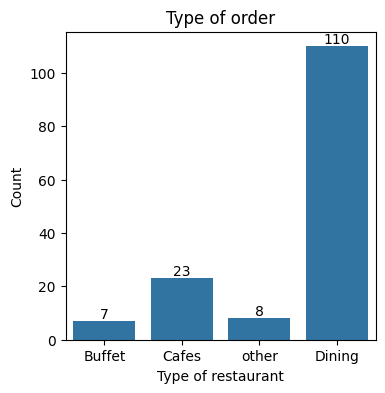

In [9]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="listed_in(type)",data=df)
ax.bar_label(ax.containers[0])
plt.title("Type of order")
plt.xlabel("Type of restaurant")
plt.ylabel("Count")
plt.show()

**Conclusion**:Majority of restaurant falls into the dinning category

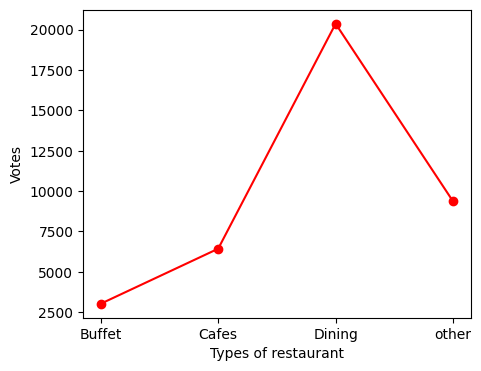

In [10]:
gd=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':gd})
plt.figure(figsize=(5,4))
plt.plot(result,c="red",marker="o")
plt.xlabel("Types of restaurant")
plt.ylabel("Votes")
plt.show()

**Conclusion**: Large number of individual prefers Dining restaurant

In [11]:
max_votes=df['votes'].max()
restaurant_with_max_votes=df.loc[df['votes']==max_votes,'name']

print("Restaurant with max votes is :",restaurant_with_max_votes)

Restaurant with max votes is : 38    Empire Restaurant
Name: name, dtype: object


**Conclusion**:Restaurant with highest votes is Empire Restaurant

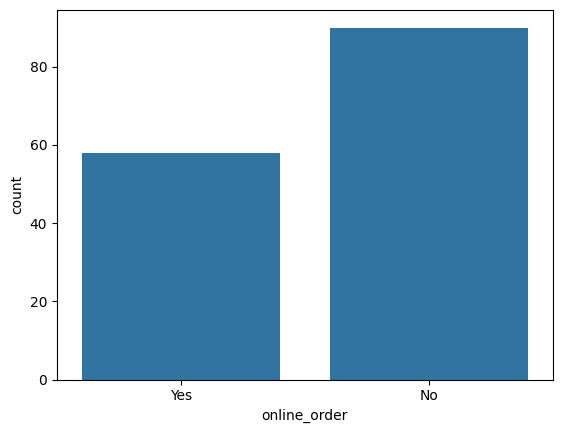

In [12]:
sns.countplot(x='online_order',data=df)
plt.show()

**Conclusion**:This suggests that majority of restaurant do not accepts online orders

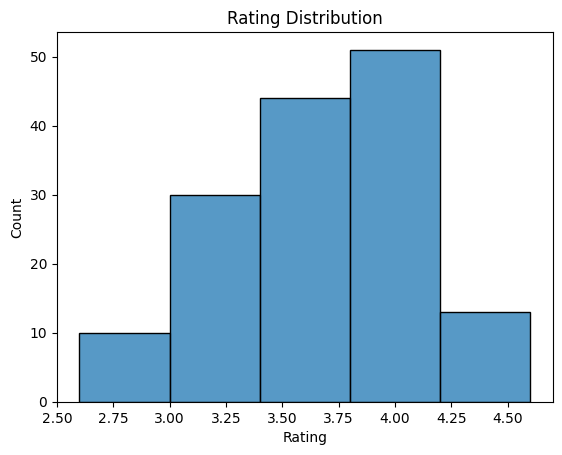

In [13]:
sns.histplot(x='rate',data=df,bins=5)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

**Conclusion**:Majority of restaurant received rating between 3.5 to 4

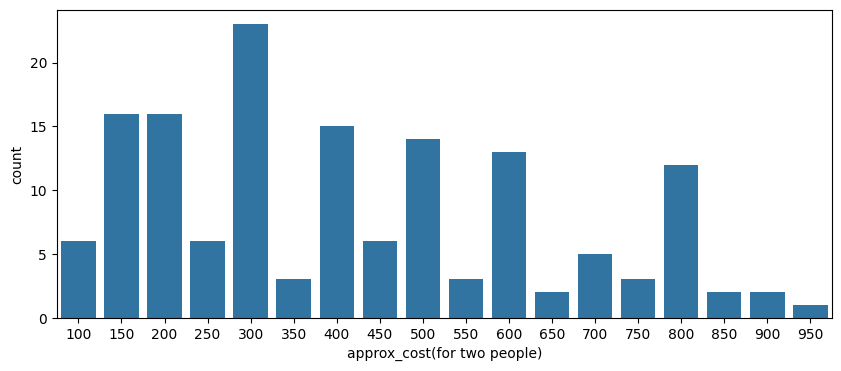

In [16]:
plt.figure(figsize=(10,4))
sns.countplot(x='approx_cost(for two people)',data=df)
plt.show()

**Conclusion**:Majority of couples prefer restaurants with an approximate cost of 300 rupees.



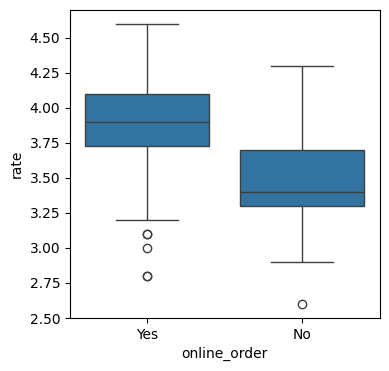

In [18]:
plt.figure(figsize=(4,4))
sns.boxplot(x="online_order",y="rate",data=df)
plt.show()

**Conclusion**:Offline orders recieved lower rating as compare to online orders

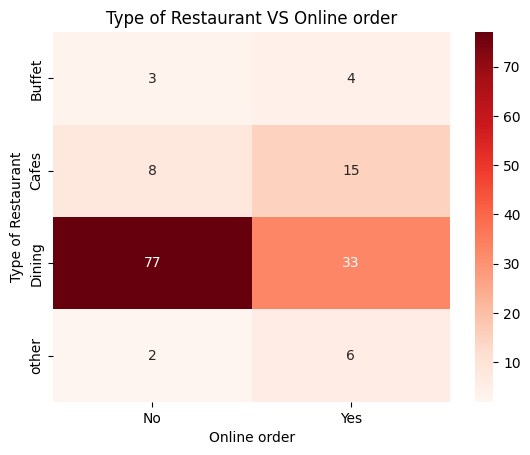

In [21]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)

sns.heatmap(pivot_table,annot=True,cmap="Reds",fmt="d")
plt.title("Type of Restaurant VS Online order")
plt.xlabel("Online order")
plt.ylabel("Type of Restaurant")
plt.show()

**Conclusion**:This shows dining restaurant accepts offline order more and cafes accepts online orders.
